In [6]:
import os, sys
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [7]:
# Get theconda create --name talib python=3.9 current working directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)


c:\Users\amanu\OneDrive\Desktop\Stock-Market-Analysis\notebooks
c:\Users\amanu\OneDrive\Desktop\Stock-Market-Analysis


In [8]:
import pandas as pd

# read the CSV 
data = pd.read_csv('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
print(data.isnull().sum())
data.info()
data.shape

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


(1407328, 6)

In [10]:
time_data = data['date'].apply(lambda x: len(x.split()) > 1)
print(time_data.sum())

1407328


In [11]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sentiment_data=data.copy()

In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

KeyboardInterrupt: 

In [ ]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000


In [ ]:
# Select the columns you want to save
columns_to_save = ['date', 'stock', 'sentiment']
new_df = sentiment_data[columns_to_save]

# Save the new DataFrame to a CSV file
new_df.to_csv('../data/news_for_correlation.csv', index=False)

In [ ]:
new_df

,date,stock,sentiment
0,2020-06-05 10:30:54-04:00,A,0.0000
1,2020-06-03 10:45:20-04:00,A,0.0000
2,2020-05-26 04:30:07-04:00,A,0.0000
3,2020-05-22 12:45:06-04:00,A,0.0000
4,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...
1407323,2011-08-29 00:00:00,ZX,0.2023
1407324,2011-06-22 00:00:00,ZX,-0.3818
1407325,2011-06-21 00:00:00,ZX,0.0000
1407326,2011-06-21 00:00:00,ZX,0.0000


In [ ]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

In [ ]:
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,0.0000,Neutral


In [ ]:
sentiment_data['sentiment_category'].value_counts()

Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: sentiment_category, dtype: int64

In [ ]:
amazon_data = sentiment_data[sentiment_data['stock'] == 'AMZN']
amazon_data


,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_category
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 13:18:50-04:00,AMZN,0.1779,Neutral
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AMZN,0.5574,Positive
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AMZN,0.2023,Neutral
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10 07:20:03-04:00,AMZN,0.6486,Positive
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 00:52:01-04:00,AMZN,0.0516,Neutral
...,...,...,...,...,...,...,...,...
76450,77194,3 Sector ETFs For This Week's Earnings Parade,https://www.benzinga.com/news/earnings/20/04/1...,ETF Professor,2020-04-27 00:00:00,AMZN,0.0000,Neutral
76451,77195,Amazon Statement Shows Co. Extends Closure Of ...,https://www.benzinga.com/news/20/04/15888140/a...,Benzinga Newsdesk,2020-04-27 00:00:00,AMZN,0.2960,Neutral
76452,77196,Will COVID-19 Accelerate The Adoption Of Auton...,https://www.benzinga.com/news/20/04/15887271/w...,FreightWaves,2020-04-27 00:00:00,AMZN,0.0000,Neutral
76453,77197,SunTrust Robinson Humphrey Maintains Buy on Am...,https://www.benzinga.com/news/20/04/15885780/s...,Vick Meyer,2020-04-27 00:00:00,AMZN,0.0000,Neutral


In [ ]:
print(amazon_data['date'].min(), amazon_data['date'].max())

2020-04-27 00:00:00 2020-06-10 13:18:50-04:00


In [ ]:
amazon_data['sentiment_category'].value_counts()

Neutral          201
Negative          38
Positive          28
Very Negative     11
Name: sentiment_category, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy import stats
import nltk
from textblob import TextBlob
nltk.download('vader_lexicon', quiet=True)


True

In [ ]:

# Load the datasets
news_df = pd.read_csv('../data/news_for_correlation.csv')
stock_df = pd.read_csv('../data/AMZN_historical_data.csv')
print("News DataFrame columns:")
print(news_df.columns)
print("\nStock DataFrame columns:")
print(stock_df.columns)



News DataFrame columns:
Index(['date', 'stock', 'sentiment'], dtype='object')

Stock DataFrame columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [ ]:
news_df

,date,stock,sentiment
0,2020-06-05 10:30:54-04:00,A,0.0000
1,2020-06-03 10:45:20-04:00,A,0.0000
2,2020-05-26 04:30:07-04:00,A,0.0000
3,2020-05-22 12:45:06-04:00,A,0.0000
4,2020-05-22 11:38:59-04:00,A,0.2960
...,...,...,...
1407323,2011-08-29 00:00:00,ZX,0.2023
1407324,2011-06-22 00:00:00,ZX,-0.3818
1407325,2011-06-21 00:00:00,ZX,0.0000
1407326,2011-06-21 00:00:00,ZX,0.0000


In [ ]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [ ]:
print(stock_df['Date'].min(), stock_df['Date'].max())

1997-05-15 2024-07-30


In [ ]:
import pandas as pd

# Assuming your DataFrame is called stock_df

# Convert the 'date' column to datetime format
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

# Extract only the date part
stock_df['Date'] = stock_df['Date'].dt.date

# Now, the 'date' column in stock_df contains only the date, without the time


In [ ]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [ ]:
import pandas as pd

# Convert 'date' column to pandas datetime, removing any timezone information
news_df['Date'] = pd.to_datetime(news_df['Date'], utc=True).dt.tz_localize(None)

# If you also want to remove the time part, you can do this
news_df['Date'] = news_df['Date'].dt.date


In [ ]:
news_df

,Date,stock,sentiment
0,2020-06-05,A,0.0000
1,2020-06-03,A,0.0000
2,2020-05-26,A,0.0000
3,2020-05-22,A,0.0000
4,2020-05-22,A,0.2960
...,...,...,...
1407323,2011-08-29,ZX,0.2023
1407324,2011-06-22,ZX,-0.3818
1407325,2011-06-21,ZX,0.0000
1407326,2011-06-21,ZX,0.0000


In [ ]:
news_df.to_csv('../data/new_correlation.csv', index=False)

In [ ]:
import nltk
from textblob import TextBlob

# Download the necessary NLTK data (only need to run once)
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
new_correlation = pd.read_csv('../data/new_correlation.csv')

In [ ]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [ ]:
# Align sentiment and stock data by dates
aligned_data = pd.merge(new_correlation, stock_df, left_index=True, right_index=True)


In [ ]:
# Calculate daily returns
stock_df["stock_returns"] = stock_df['Close'].pct_change()
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_returns
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,-0.117028
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,-0.012040
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,-0.042685
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,-0.127392
...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,-0.029934
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,-0.005419
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,0.014734
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,0.003836


In [ ]:
# Merge news_df and stock_df on the date column
merged_df = pd.merge(new_correlation,stock_df, on='Date')

# Display the merged DataFrame
merged_df


,Date,stock,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_returns
0,2020-06-05,A,0.0000,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.009103
1,2020-06-05,AA,0.0000,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.009103
2,2020-06-05,AAN,0.8834,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.009103
3,2020-06-05,AAWW,0.0000,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.009103
4,2020-06-05,ABC,0.0000,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,0.009103
...,...,...,...,...,...,...,...,...,...,...,...,...
1379677,2009-07-16,K,0.0000,4.221000,4.312000,4.186000,4.305500,4.305500,107238000,0.0,0.0,0.018451
1379678,2009-06-22,KO,0.8555,4.120500,4.121500,3.928000,3.957500,3.957500,194888000,0.0,0.0,-0.045926
1379679,2009-07-24,QID,0.0000,4.380000,4.445000,4.275000,4.324500,4.324500,384092000,0.0,0.0,-0.078619
1379680,2009-07-10,SUN,0.0000,3.876000,3.941000,3.808500,3.881500,3.881500,119522000,0.0,0.0,-0.006018


In [ ]:
merged_df = merged_df[merged_df['stock'] == 'AMZN']
merged_df

,Date,stock,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,stock_returns
1781,2020-05-26,AMZN,0.6249,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.006164
1782,2020-05-26,AMZN,0.1779,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.006164
1783,2020-05-26,AMZN,0.1779,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.006164
1784,2020-05-26,AMZN,0.4939,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.006164
1785,2020-05-26,AMZN,0.5106,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,0.0,0.0,-0.006164
...,...,...,...,...,...,...,...,...,...,...,...,...
972513,2020-05-04,AMZN,0.0000,112.819000,116.348999,112.819000,115.799500,115.799500,97318000,0.0,0.0,0.013101
972514,2020-05-04,AMZN,0.3400,112.819000,116.348999,112.819000,115.799500,115.799500,97318000,0.0,0.0,0.013101
972515,2020-05-04,AMZN,-0.2263,112.819000,116.348999,112.819000,115.799500,115.799500,97318000,0.0,0.0,0.013101
972516,2020-05-04,AMZN,-0.2960,112.819000,116.348999,112.819000,115.799500,115.799500,97318000,0.0,0.0,0.013101


In [ ]:
correlation = merged_df['sentiment'].corr(merged_df['Close'])
print(correlation)

0.10583319446836054


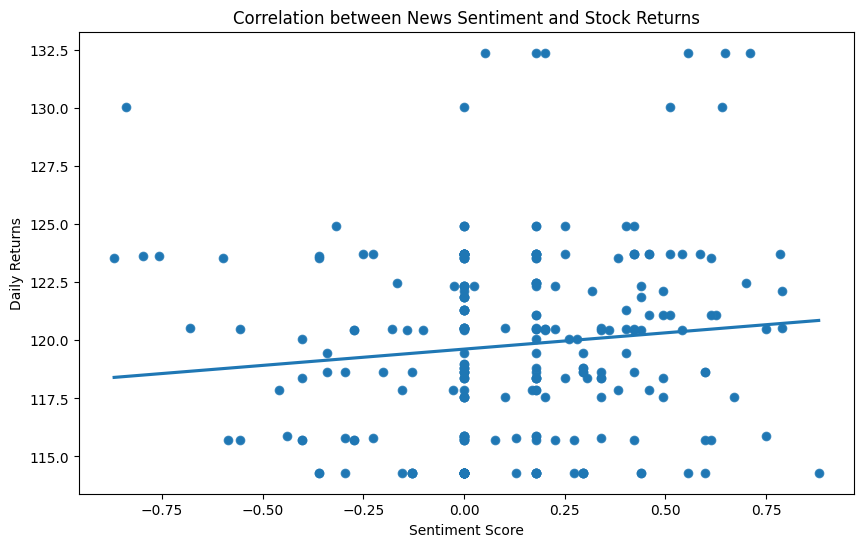

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='Close', data=merged_df)

# Add a regression line
sns.regplot(x='sentiment', y='Close', data=merged_df, ci=None)

# Set title and labels
plt.title('Correlation between News Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Returns')

# # Display the correlation coefficient
# plt.text(0.5, 0.9, f'r = {correlation:.2f}', transform=plt.gca().transAxes, ha='center')

# Show the plot
plt.show()

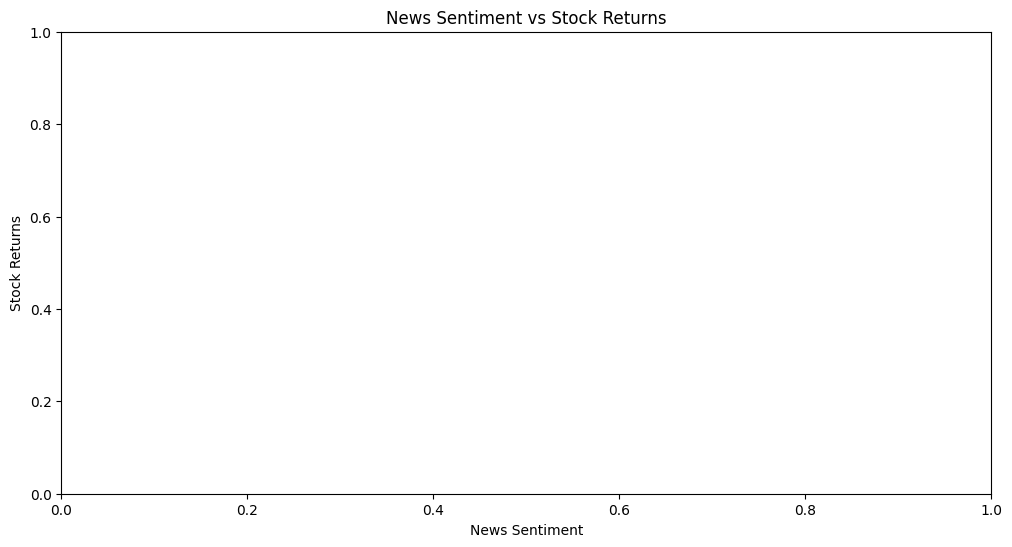

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.xlabel('News Sentiment')
plt.ylabel('Stock Returns')
plt.title('News Sentiment vs Stock Returns')
plt.show()

In [1]:
import os
import sys

sys.path.insert(0, 'C:/Users/amanu/OneDrive/Desktop/Stock-Market-Analysis/')

In [2]:
from scripts.main import perform_sentiment_analysis, analyze_correlation

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Example usage
input_file_path = '../data/raw_analyst_ratings.csv'
output_file_path = '../data/news_for_correlation_one.csv'
perform_sentiment_analysis(input_file_path, output_file_path)

c:\Users\amanu\OneDrive\Desktop\Stock-Market-Analysis\notebooks
c:\Users\amanu\OneDrive\Desktop\Stock-Market-Analysis


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

News DataFrame columns:
Index(['date', 'stock', 'sentiment'], dtype='object')

Stock DataFrame columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
0.021010968141555234


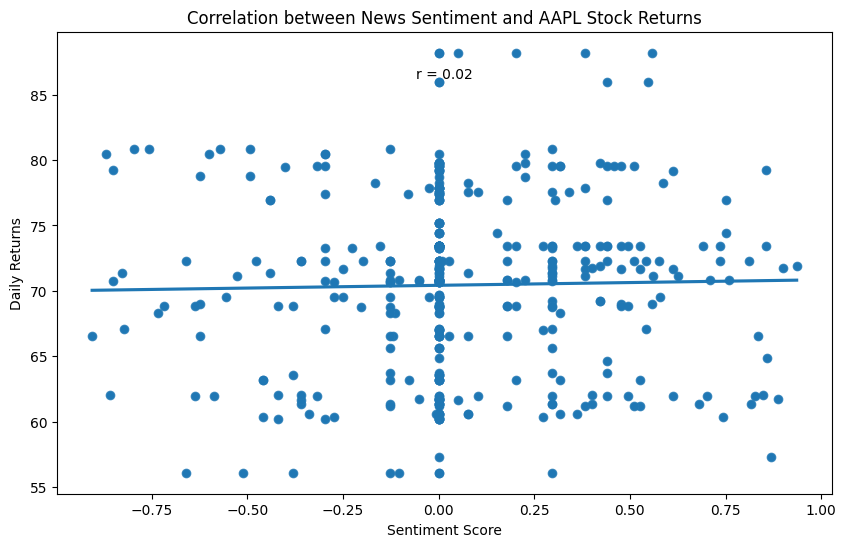

In [3]:
# Example usage
news_file_path = '../data/news_for_correlation.csv'
stock_file_path = '../data/AAPL_historical_data.csv'
stock_symbol = 'AAPL'
analyze_correlation(news_file_path, stock_file_path, stock_symbol)

News DataFrame columns:
Index(['date', 'stock', 'sentiment'], dtype='object')

Stock DataFrame columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
-0.0009568769946047358


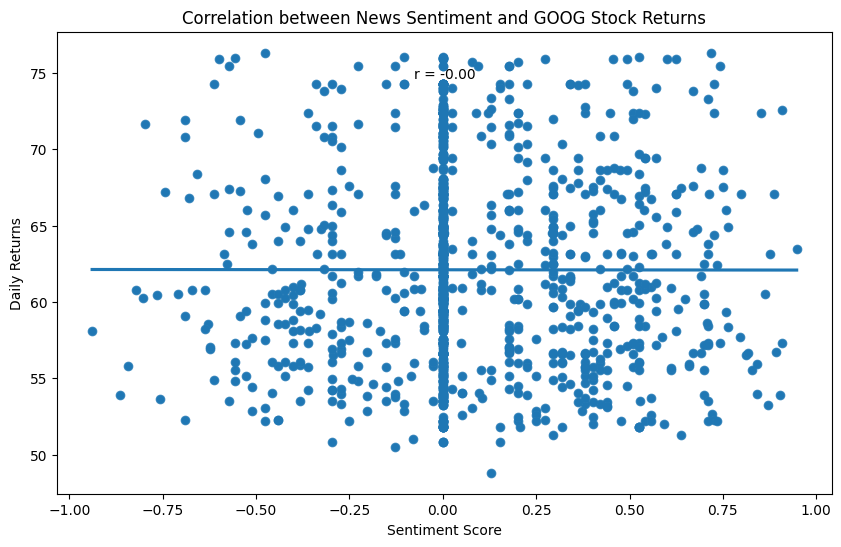

In [4]:
# Example usage
news_file_path = '../data/news_for_correlation.csv'
stock_file_path = '../data/GOOG_historical_data.csv'
stock_symbol = 'GOOG'
analyze_correlation(news_file_path, stock_file_path, stock_symbol)

News DataFrame columns:
Index(['date', 'stock', 'sentiment'], dtype='object')

Stock DataFrame columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
0.03656430626505983


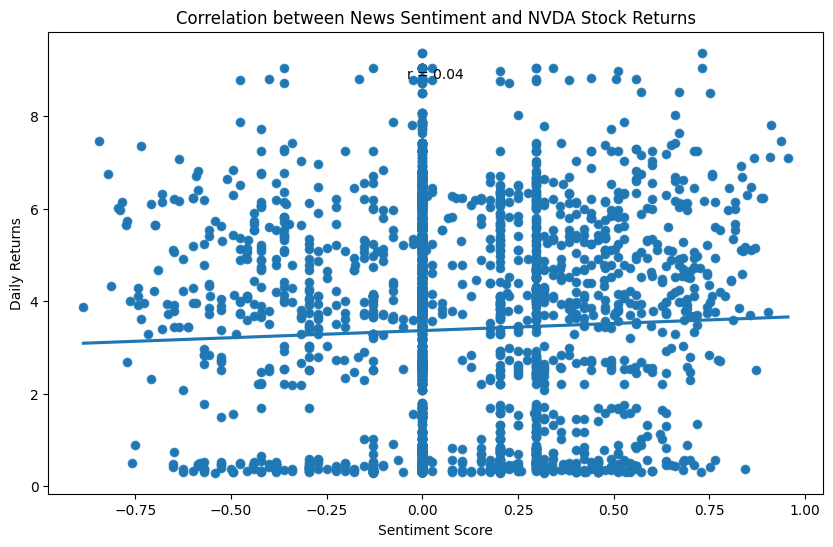

In [5]:
# Example usage
news_file_path = '../data/news_for_correlation.csv'
stock_file_path = '../data/NVDA_historical_data.csv'
stock_symbol = 'NVDA'
analyze_correlation(news_file_path, stock_file_path, stock_symbol)

News DataFrame columns:
Index(['date', 'stock', 'sentiment'], dtype='object')

Stock DataFrame columns:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')
-0.01150159421658366


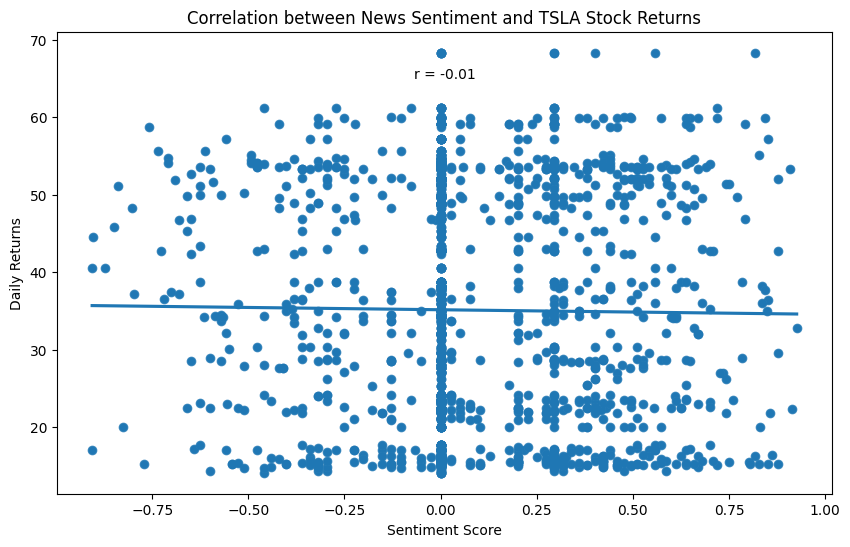

In [6]:
# Example usage
news_file_path = '../data/news_for_correlation.csv'
stock_file_path = '../data/TSLA_historical_data.csv'
stock_symbol = 'TSLA'
analyze_correlation(news_file_path, stock_file_path, stock_symbol)